# School of Hard Knocks

This notebook is a dive into Machine Learning and Data Science by using a fake school of test data. By carefully and deliberately generating a fake school's test results, we can insert patterns, irregularities and trends and test our analysis to make sure we pick it up.


In [41]:
# Required libraries and imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [54]:
class Generator:
    """
    Handles the generation of students results for analysis.
    """
    def __init__(self, limit):
        with open("names_male.txt", 'r') as f:
            self.boys = [name.split(' ')[0] for name in f.readlines()]
        with open("names_female.txt", 'r') as f:
            self.girls = [name.split(' ')[0] for name in f.readlines()]
        self.limit = limit
            
    def get_names(self):
        return pd.Series(self.boys[0: self.limit])
    
    def get_scores(self):
        rint = np.random.randint
        return pd.Series([rint(0, 101) for x in range(0, self.limit)])

gen = Generator(10)
results = pd.DataFrame({"Name": gen.get_names(),
                        "Score": gen.get_scores()})
results.describe()




,Score
count,10.000000
mean,48.300000
std,22.221361
min,14.000000
25%,37.000000
50%,43.000000
75%,61.250000
max,87.000000


(array([1., 1., 0., 3., 1., 1., 1., 0., 1., 1.]),
 array([14. , 21.3, 28.6, 35.9, 43.2, 50.5, 57.8, 65.1, 72.4, 79.7, 87. ]),
 <a list of 10 Patch objects>)

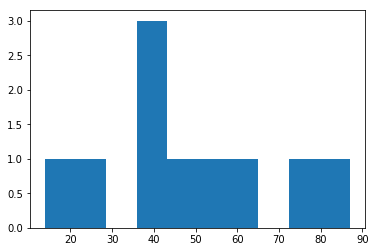

In [56]:
num_bins = 50


fig, ax = plt.subplots()
ax.hist(results['Score'])


In [ ]:
city_names = pd.Series(['San Francisco', 'San Jose', 'Sacramento'])
population = pd.Series([852469, 1015785, 485199])
cities = pd.DataFrame({ 'City name': city_names, 'Population': population })
cities['Area square miles'] = pd.Series([46.87, 176.53, 97.92])
cities['Population density'] = cities['Population'] / cities['Area square miles']

In [47]:
cities['City name'].apply(lambda c: c.startswith('San')) & cities['Area square miles'].apply(lambda c: c > 50)

0    False
1     True
2    False
dtype: bool

In [57]:
cities.reindex(np.random.permutation(cities.index))
cities

,City name,Population,Area square miles,Population density
0,San Francisco,852469,46.87,18187.945381
2,San Jose,1015785,176.53,5754.177760
1,Sacramento,485199,97.92,4955.055147
